### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the final section of this lesson.


(1) What is the independent variable? What is the dependent variable?

> **The Independent Variable:** The two conditions of the task, in other word; the congruent words condition and the incongruent words condition 

> **The Dependent Variable:** The measured time it takes to name the ink colors in equally-sized lists

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

#### Notations:
- H0 is the Null Hypothesis
- H1 is the Alternative Hypothesis
- μC Will be the Congruent population mean 
- μI Will be the Incongruent population mean 
- n sample size

#### Hypothese:

> I would like to prove that it takes longer to correctly name the color ink of a word labels another color name.
> It takes the human mind longer (even if only few extra milliseconds) to react and figure out the difference betwwen the color name and the actual ink color than when having the color name printed in the same color.....This is my alternatice hypothesis.

>The null hypothesis would be to have both tests done with the same time, or have the incongruent condition correctly done with less time. I will be trying to find prove significant enough to reject this null hypothesis.

> **Null Hypothesis:** It takes **_the same or more time_** to name the ink color in the congruent condition than it takes to name the ink color in the incongruent condition
>> H0 = μC  -  μI  >=  0

> **Alternative Hypothesis:** The time it takes **_less time_** to name the ink color in the congruent condition as it takes to name the ink color in the incongruent condition
>> H1 = μC  -  μI  <  0


#### Statistical Test

> Assuming that the population has a normal distribution, and since we have small sample size n = 24 and we don't know the population standard deviation, I will be using **t-test** for my analysis

> Because both observations are dependent and both samples ("before" and "after") measure the same subjects, i will be using a **paired t-test** for my analysis.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
# loading all needed libraries

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# uploading and reading the dataset

df=pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
# What would the data tell us
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


> The difference between the 3rd quartile and the maximum number in the Incongruent condition is so high compared to other statistics and to the same measurement for the Congruent condition. This would be a good reason to check outliers.

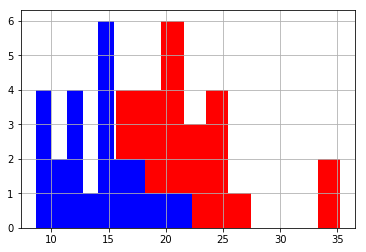

In [5]:
# a histogram will tell us more

df.Incongruent.hist(color='r')
df.Congruent.hist(color='b')

> we will not remove the outliers, since we did not determine they are bad data,

In [6]:
# it would also be a good idea to check the difference in timing between the two conditions
# add a diff column to the dataframe

df['diff'] =  df['Incongruent'] - df['Congruent']

df = df.reset_index(drop=True)

In [7]:
# Checking data statistics again after dropping outliers

df.describe()

,Congruent,Incongruent,diff
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


> #### Numbers:
- The min recorded time for the Incongruent condition is 15.7 sec and max is 35.3 while the max for Congruent condition is 22.3 and the min is 8.6
- The Congruent condition is less spread with a range of 13.7, while the range for the Incongruent condition is 19.6
- Average for the Incongruent condition is 22 while it's 14 for the Congruent condition

> #### Conclusion:
- On average it takes extra 8 seconds to name the ink color in the Incongruent condition than the Congruent condition.
- This mean, on average, naming ink color correctly can be done faster in the Congruent condition than in the Incongruent condition. And the variation in response time is lower.


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

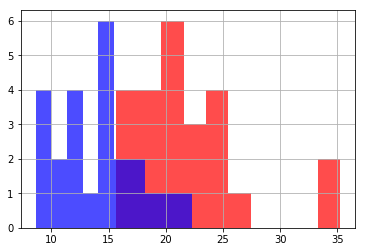

In [8]:
# checking distribution on the reaction time for both conditions

df.Incongruent.hist(color='r', alpha=0.7)
df.Congruent.hist(color='b', alpha=0.7)

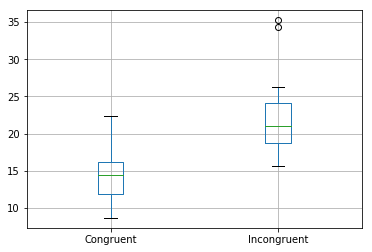

In [9]:
# How is the data spread 

df[['Congruent', 'Incongruent']].boxplot()

> From the boxplot, The median for the Incongruent condition (~ 21 sec) is higher than that of the Congruent (~ 14 sec). 

> The Incongruent condition has more spread with a 4.8 std (~16sec to ~35sec) while the Congruent condition 3.6 std has a spread (~9sec to ~ 22sec)

> This supports our earlier finding that on average Incongruent condition requires more time and data is more variant.


(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [11]:
#Scipy provide results for two tailed test, since i want a one tail, the one-sided p-value is just half of the two-sided pvalue

t_score, p_value = stats.ttest_rel(df['Incongruent'], df['Congruent'])
print('t-score:', t_score, 'p-value:', p_value)

t-score: 8.02070694411 p-value: 4.10300058571e-08


> I chose my confidence level as 95% with Type I error of 5% (a= 0.05)

In [12]:
# checking to make sure 
a = 0.05
p_value/2 < a and t_score > 0

True

> To make sure, i would like to apply the test on a larger sample size, so will generate a sampling distribution

In [15]:
#creating sampling distribution
p_con = []
p_incon = []
for i in range(10000):
    boot = df.sample(df.shape[0], replace =True)
    con = boot['Congruent'].mean()
    incon = boot['Incongruent'].mean()
    p_con.append(con)
    p_incon.append(incon)

In [16]:
#Checking the test

t_score, p_value = stats.ttest_rel(p_incon, p_con)
print('t-score:', t_score, 'p-value:', p_value)

t-score: 823.520683926 p-value: 0.0


In [17]:
# checking to make sure 
a = 0.05
p_value/2 < a and t_score > 0

True

>### Conclusion:
>> - Since the p_value is less than type one error, we can reject the null hypothesis.
>> - This supports our previous finding: It takes more time to correctly name the color of the ink in the Incongruent condition than it takes in the Congruent condition

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

> ### Why this result: 
>> I believe it's because of how our brains process and reacts to seeing and reading. sight happens faster than comprehension. So our brain registers the color we see before reading the word and understanding what it means. 

> ### Other alternative (similar tests)
- The colored numbers test:
>>Having to see random numbers and the person who is taking the test should name the color if the ink is colored or say the number if the ink is black
- The colored words
>>Having to see random words and the person who is taking the test should name the color if the ink is colored or say the word if the ink is black
- Numerical Stroop effect:
>>Demonstrates the relationship between numerical values and physical sizes
>>Having to see two numbers in different sizes  irrespective of their actual values. The two variations are: physical or a numerical size judgement task in separate blocks. In the numerical task, participants respond to the values and ignore the physical sizes and in the physical task, participants respond to the sizes and ignore the values

#### Resources:
- https://stackoverflow.com
- https://en.wikipedia.org
- http://blog.minitab.com
- https://udacitydatascience.slack.com
- https://docs.scipy.org